In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from warnings import filterwarnings
filterwarnings('ignore')

#### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [2]:
df = pd.read_csv('Holiday_Package.csv')

In [3]:
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [4]:
df.tail()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes
871,872,no,74659,51,10,0,0,yes


In [5]:
df.shape

(872, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


#####  Data Description

In [7]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,872.0,NaN,NaN,NaN,436.5,251.869014,1.0,218.75,436.5,654.25,872.0
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872.0,NaN,NaN,NaN,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,NaN,NaN,NaN,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,NaN,NaN,NaN,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,NaN,NaN,NaN,0.311927,0.61287,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,NaN,NaN,NaN,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### check for Null Values

In [8]:
df.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

#### check for Duplicates

In [9]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


#### unique values for categorical variables

In [13]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




In [16]:
df.Holliday_Package.value_counts(1)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

#### Univariate / Bivariate analysis

Text(0.5, 1.0, 'no_older_children Distribution')

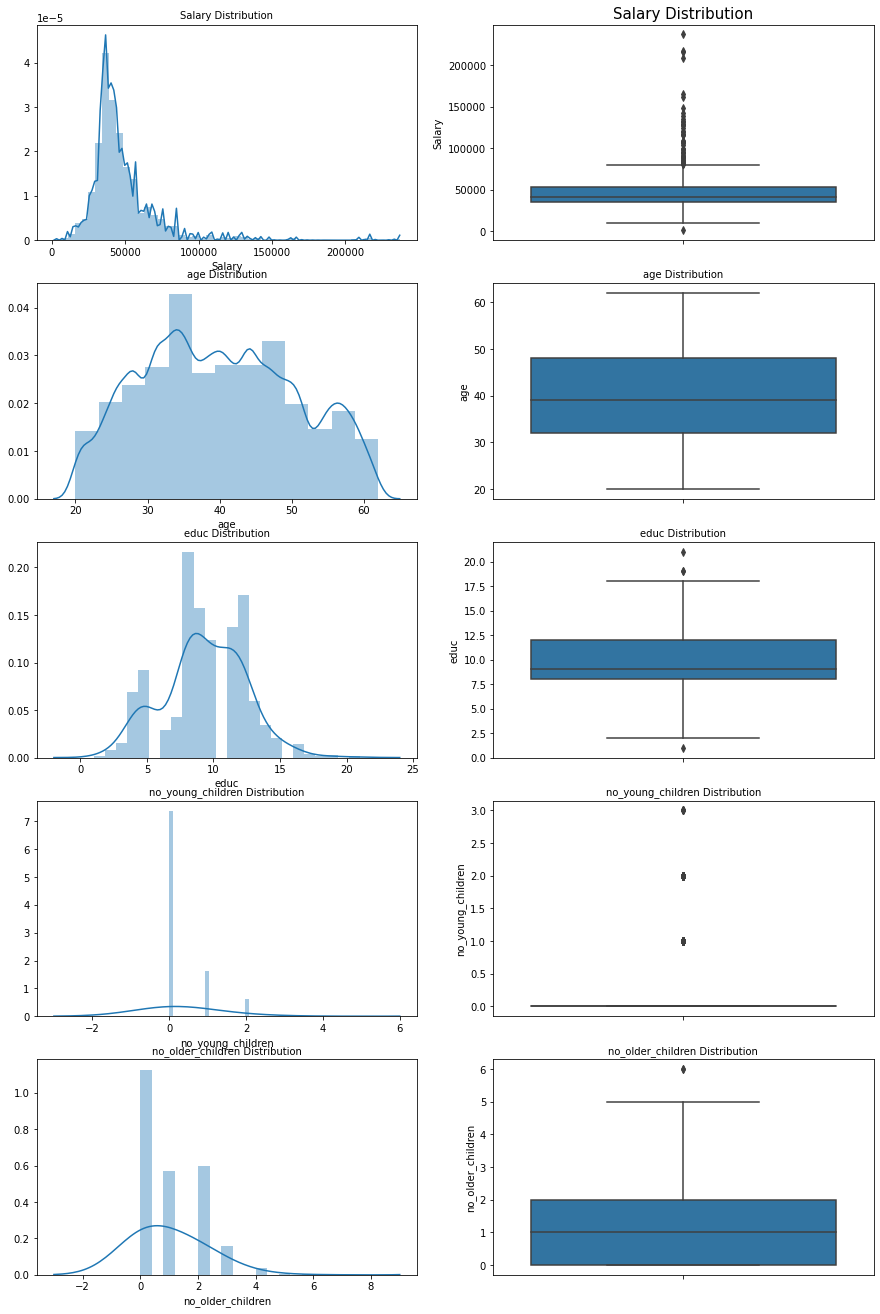

In [17]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(15, 23)

a = sns.distplot(df['Salary'], kde_kws = {'bw' : 1}, ax=axes[0][0])
a.set_title("Salary Distribution",fontsize=10)

a = sns.boxplot(df['Salary'] , orient = "v" , ax=axes[0][1])
a.set_title("Salary Distribution",fontsize=15)

a = sns.distplot(df['age'], kde_kws = {'bw' : 1}, ax=axes[1][0])
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[1][1])
a.set_title("age Distribution",fontsize=10)

a = sns.distplot(df['educ'],  kde_kws = {'bw' : 1}, ax=axes[2][0])
a.set_title("educ Distribution",fontsize=10)

a = sns.boxplot(df['educ'] , orient = "v" , ax=axes[2][1])
a.set_title("educ Distribution",fontsize=10)

a = sns.distplot(df['no_young_children'],  kde_kws = {'bw' : 1}, ax=axes[3][0])
a.set_title("no_young_children Distribution",fontsize=10)

a = sns.boxplot(df['no_young_children'] , orient = "v" , ax=axes[3][1])
a.set_title("no_young_children Distribution",fontsize=10)

a = sns.distplot(df['no_older_children'], kde_kws = {'bw' : 1}, ax=axes[4][0])
a.set_title("no_older_children Distribution",fontsize=10)

a = sns.boxplot(df['no_older_children'] , orient = "v" , ax=axes[4][1])
a.set_title("no_older_children Distribution",fontsize=10)

In [18]:
df.columns

Index(['Unnamed: 0', 'Holliday_Package', 'Salary', 'age', 'educ',
       'no_young_children', 'no_older_children', 'foreign'],
      dtype='object')

In [20]:
df.skew()

Unnamed: 0           0.000000
Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

#### Categorical Variables

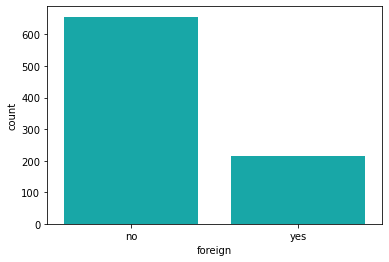

In [22]:
sns.countplot(x='foreign', data=df, color="c")

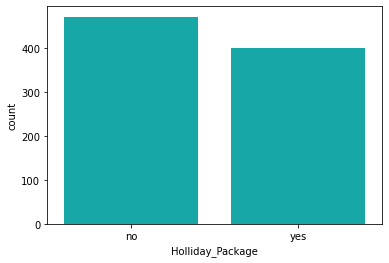

In [23]:
sns.countplot(x='Holliday_Package', data=df, color="c")

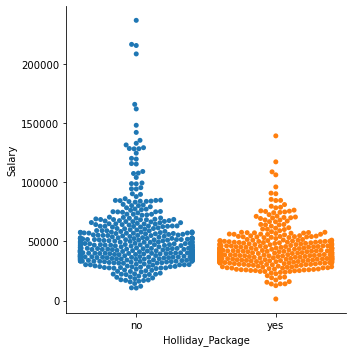

In [24]:
sns.catplot(x='Holliday_Package', y="Salary", kind="swarm", data=df)

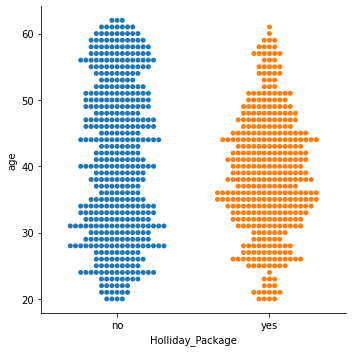

In [25]:
sns.catplot(x='Holliday_Package', y="age", kind="swarm", data=df)

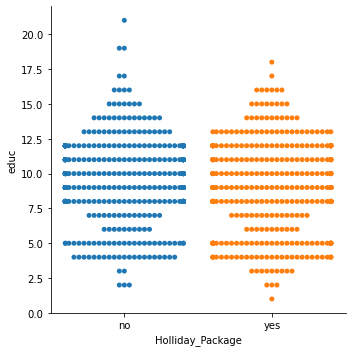

In [26]:
sns.catplot(x="Holliday_Package", y="educ",kind="swarm",data=df)

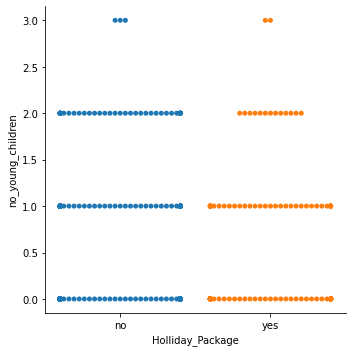

In [27]:
sns.catplot(x="Holliday_Package", y="no_young_children",kind="swarm",data=df)

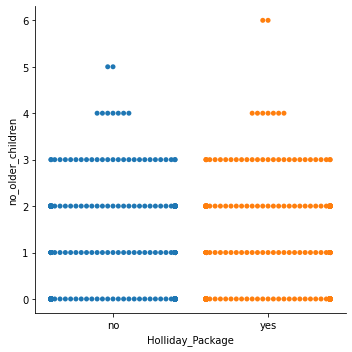

In [28]:
sns.catplot(x="Holliday_Package", y="no_older_children",kind="swarm",data=df)

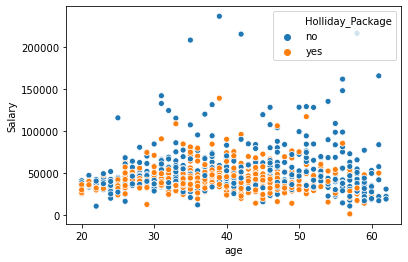

In [29]:
sns.scatterplot(data = df, x='age',y='Salary', hue = 'Holliday_Package')

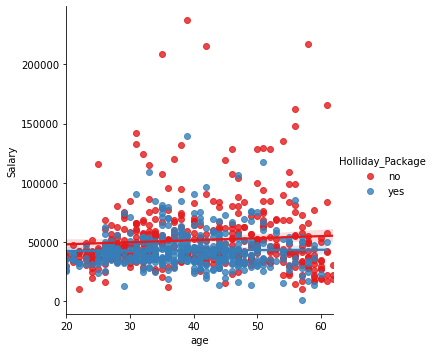

In [30]:
sns.lmplot(x="age", y="Salary", hue="Holliday_Package", data=df,
               palette="Set1")

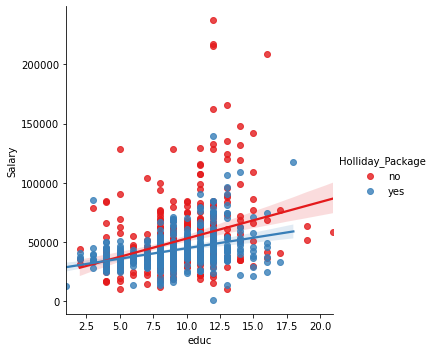

In [31]:
sns.lmplot(x="educ", y="Salary", hue="Holliday_Package", data=df,
               palette="Set1")

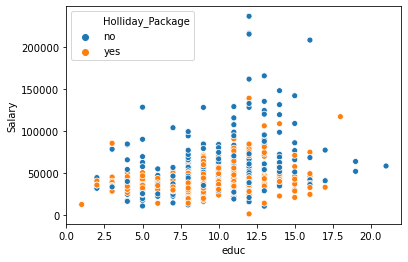

In [32]:
sns.scatterplot(data = df, x='educ',y='Salary', hue = 'Holliday_Package')

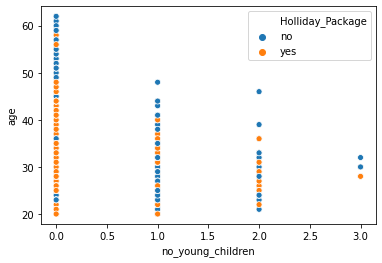

In [33]:
sns.scatterplot(data = df, x='no_young_children',y='age', hue = 'Holliday_Package')

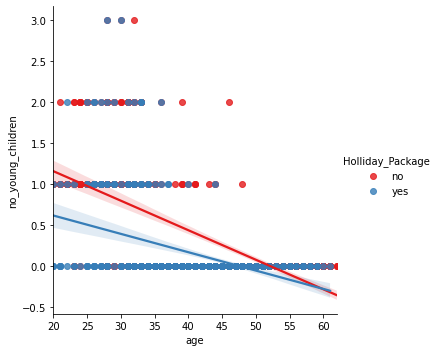

In [34]:
sns.lmplot(x="age", y="no_young_children", hue="Holliday_Package", data=df,
               palette="Set1")

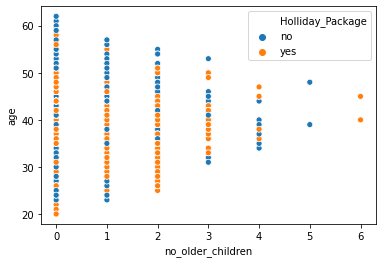

In [35]:
sns.scatterplot(data = df, x='no_older_children',y='age', hue = 'Holliday_Package')

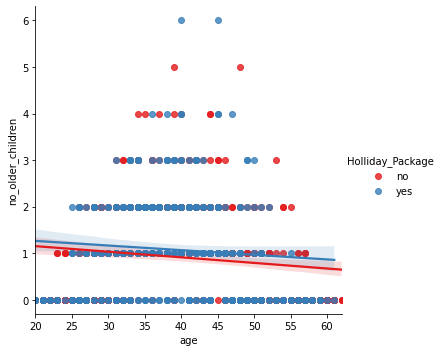

In [36]:
sns.lmplot(x="age", y="no_older_children", hue="Holliday_Package", data=df,
               palette="Set1")

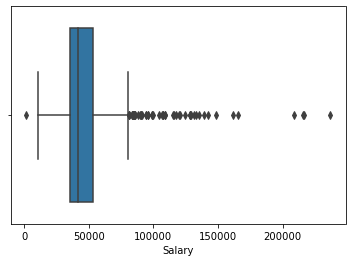

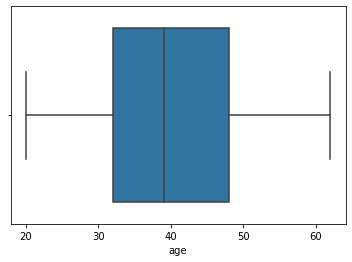

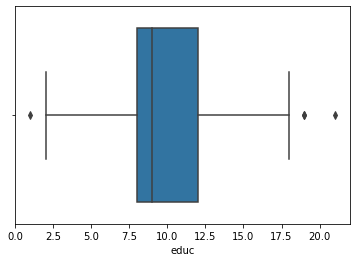

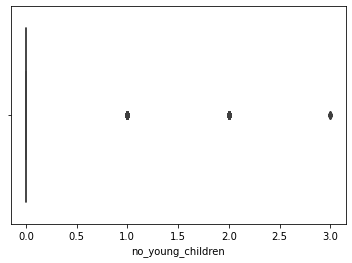

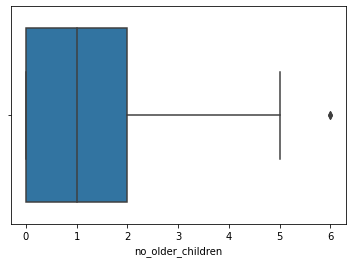

In [37]:
cols = ['Salary' ,'age', 'educ', 'no_young_children', 'no_older_children']

for i in cols:
    sns.boxplot(df[i])
    plt.show()

In [38]:
df.columns

Index(['Unnamed: 0', 'Holliday_Package', 'Salary', 'age', 'educ',
       'no_young_children', 'no_older_children', 'foreign'],
      dtype='object')

#### Data Distribution

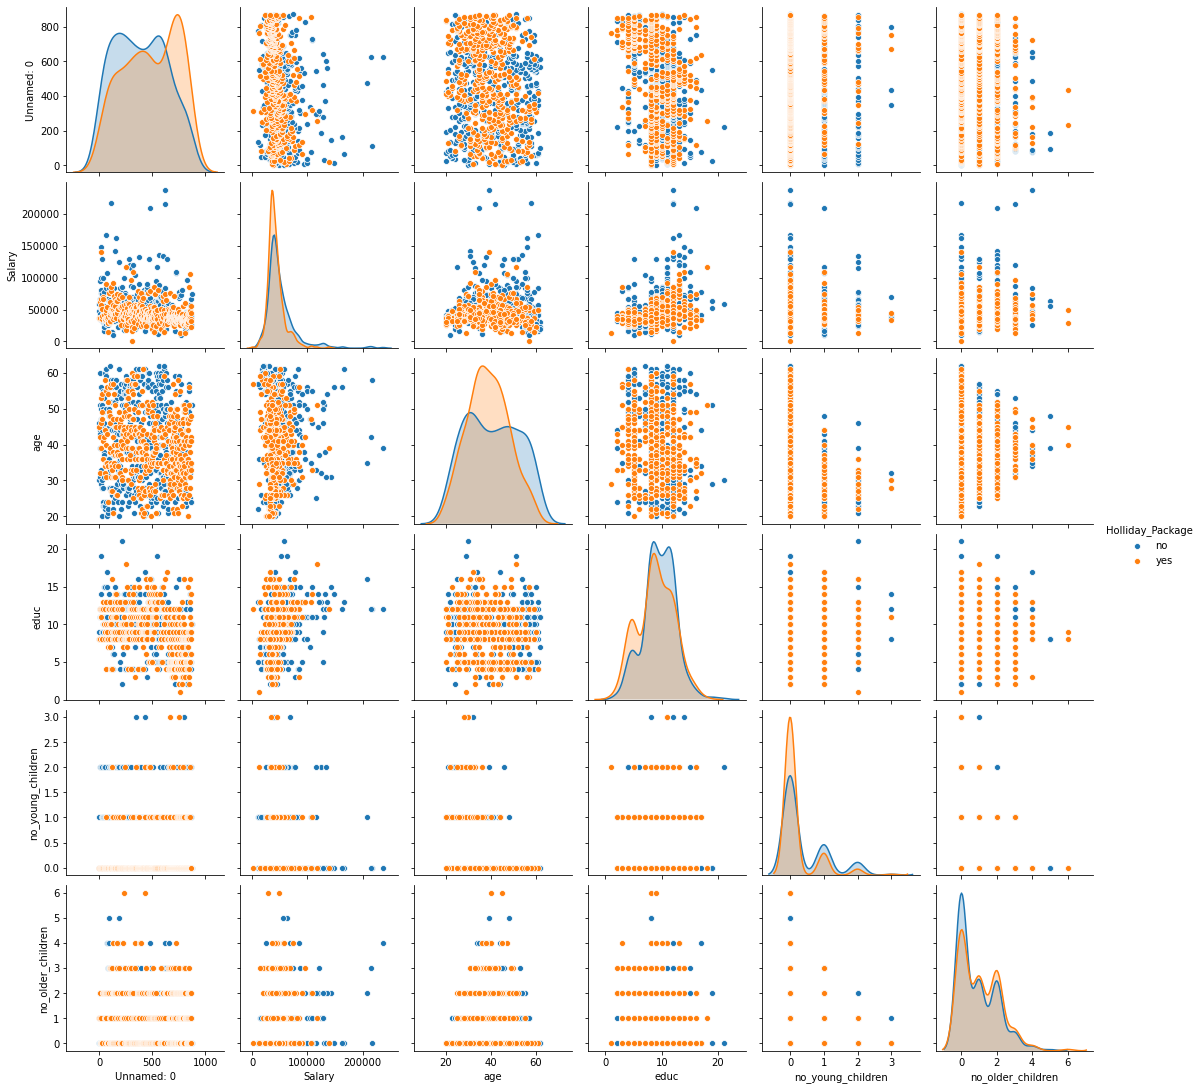

In [39]:
# Pairplot using sns
sns.pairplot(df ,diag_kind='kde' ,hue='Holliday_Package');

#### check for correlations

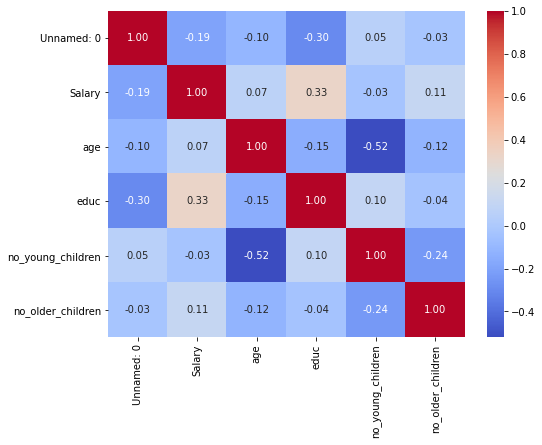

In [40]:
df_cor = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_cor, annot=True, fmt = '.2f', cmap='coolwarm')

In [41]:
df.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

#### Treating Outliers

In [42]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='object')].index

In [43]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [44]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

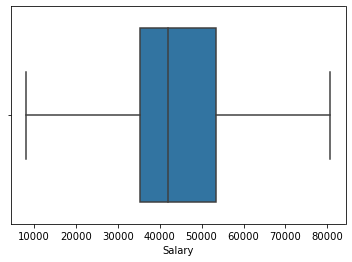

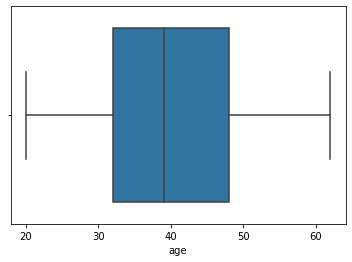

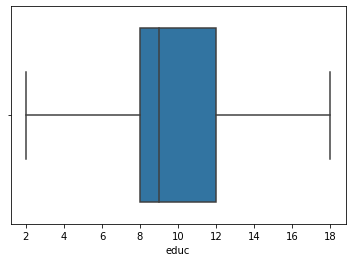

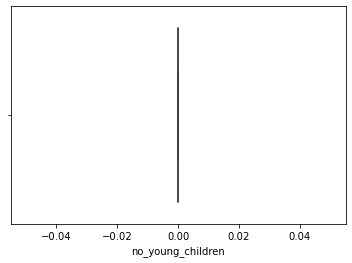

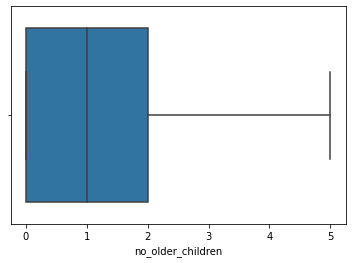

In [45]:
cols = ['Salary' ,'age', 'educ', 'no_young_children', 'no_older_children']

for i in cols:
    sns.boxplot(df[i])
    plt.show()

In [46]:
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1.0,no,48412.0,30.0,8.0,0.0,1.0,no
1,2.0,yes,37207.0,45.0,8.0,0.0,1.0,no
2,3.0,no,58022.0,46.0,9.0,0.0,0.0,no
3,4.0,no,66503.0,31.0,11.0,0.0,0.0,no
4,5.0,no,66734.0,44.0,12.0,0.0,2.0,no


In [48]:
# dropping unnamed column

df1 = df.drop(columns=['Unnamed: 0'], axis=1)

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    object 
 1   Salary             872 non-null    float64
 2   age                872 non-null    float64
 3   educ               872 non-null    float64
 4   no_young_children  872 non-null    float64
 5   no_older_children  872 non-null    float64
 6   foreign            872 non-null    object 
dtypes: float64(5), object(2)
memory usage: 47.8+ KB


In [50]:
df2 = df1.copy()

#### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [51]:
### Convert categorical to dummy variables in data

In [52]:
data = pd.get_dummies(df2, columns=['Holliday_Package','foreign'], drop_first = True)

In [53]:
data.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412.0,30.0,8.0,0.0,1.0,0,0
1,37207.0,45.0,8.0,0.0,1.0,1,0
2,58022.0,46.0,9.0,0.0,0.0,0,0
3,66503.0,31.0,11.0,0.0,0.0,0,0
4,66734.0,44.0,12.0,0.0,2.0,0,0


In [54]:
data.columns

Index(['Salary', 'age', 'educ', 'no_young_children', 'no_older_children',
       'Holliday_Package_yes', 'foreign_yes'],
      dtype='object')

#### Train/ Test split

In [55]:
# Copy all the predictor variables into X dataframe
X = data.drop('Holliday_Package_yes', axis=1)

# Copy target into the y dataframe. 
y = data['Holliday_Package_yes']

In [57]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [58]:
y_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package_yes, dtype: float64

#### Applying GridSearchCV for Logistic Regression

In [59]:
grid={'penalty':['l1','l2','none'],
      'solver':['lbfgs', 'liblinear'],
      'tol':[0.0001,0.000001]}

In [60]:
model = LogisticRegression(max_iter=100000,n_jobs=2)

In [61]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [62]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=100000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-06]},
             scoring='f1')

In [63]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-06} 

LogisticRegression(max_iter=100000, n_jobs=2, solver='liblinear', tol=1e-06)


In [64]:
best_model = grid_search.best_estimator_

#### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

In [65]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [66]:
ytrain_predict

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [67]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.636523,0.363477
1,0.576651,0.423349
2,0.650835,0.349165
3,0.568064,0.431936
4,0.536356,0.463644


#### Confusion matrix on training data

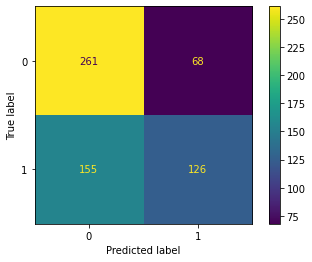

In [68]:
plot_confusion_matrix(best_model,X_train,y_train)

#### Confusion matrix on test data

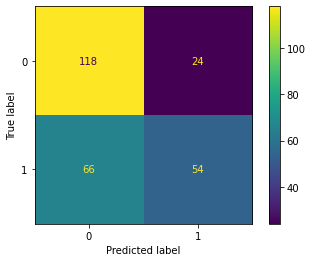

In [69]:
plot_confusion_matrix(best_model,X_test,y_test)

#### Classification report on train data

In [70]:
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.63      0.79      0.70       329
           1       0.65      0.45      0.53       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.62       610
weighted avg       0.64      0.63      0.62       610
 



#### Classification report on test data

In [71]:
print(classification_report(y_test, ytest_predict),'\n');

              precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262
 



In [72]:
# Accuracy - Training Data

lr_train_acc = best_model.score(X_train, y_train)
lr_train_acc

0.6344262295081967

#### AUC and ROC for the training data

AUC: 0.661


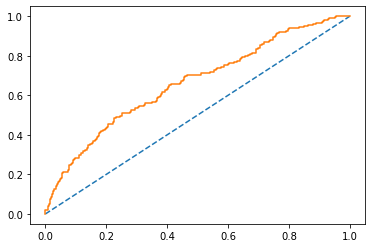

In [73]:
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [74]:
# Accuracy - Test Data

lr_test_acc = best_model.score(X_test, y_test)
lr_test_acc

0.6564885496183206

AUC: 0.675


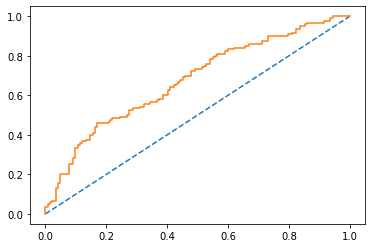

In [75]:
# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [76]:
lr_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_train_f1=round(df.loc["1"][2],2)
lr_train_recall=round(df.loc["1"][1],2)
lr_train_precision=round(df.loc["1"][0],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.65
lr_train_recall  0.45
lr_train_f1  0.53


In [77]:
lr_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_test_f1=round(df.loc["1"][2],2)
lr_test_recall=round(df.loc["1"][1],2)
lr_test_precision=round(df.loc["1"][0],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.69
lr_test_recall  0.45
lr_test_f1  0.55


#### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

#### LDA Model

In [78]:
df1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412.0,30.0,8.0,0.0,1.0,no
1,yes,37207.0,45.0,8.0,0.0,1.0,no
2,no,58022.0,46.0,9.0,0.0,0.0,no
3,no,66503.0,31.0,11.0,0.0,0.0,no
4,no,66734.0,44.0,12.0,0.0,2.0,no


In [79]:
df1.shape

(872, 7)

In [81]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    object 
 1   Salary             872 non-null    float64
 2   age                872 non-null    float64
 3   educ               872 non-null    float64
 4   no_young_children  872 non-null    float64
 5   no_older_children  872 non-null    float64
 6   foreign            872 non-null    object 
dtypes: float64(5), object(2)
memory usage: 47.8+ KB


In [82]:
for feature in df1.columns: 
    if df1[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df1[feature].unique()))
        print(pd.Categorical(df1[feature].unique()).codes)
        df1[feature] = pd.Categorical(df1[feature]).codes



feature: Holliday_Package
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


feature: foreign
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


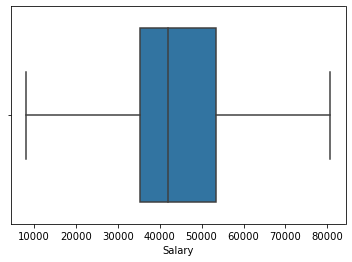

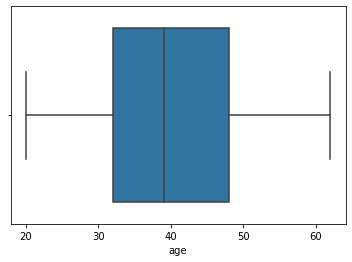

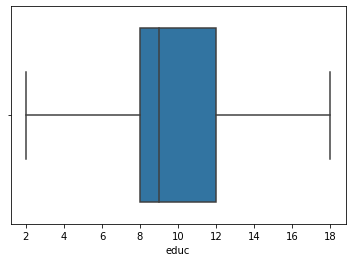

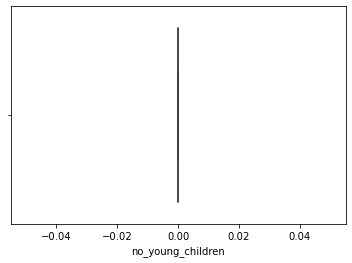

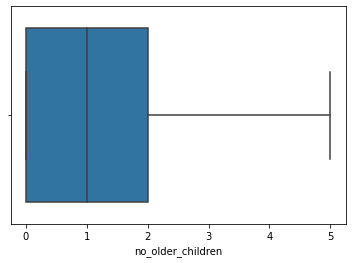

In [83]:
cols = ['Salary' ,'age', 'educ', 'no_young_children', 'no_older_children']

for i in cols:
    sns.boxplot(df1[i])
    plt.show()

In [84]:
X = df1.drop('Holliday_Package',axis=1)
y = df1.pop('Holliday_Package')

In [85]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.30,random_state=1,stratify = y)

In [86]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

#### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

In [87]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

##### pred_class_test

In [89]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [90]:
lda_train_acc = model.score(X_train,y_train)
lda_train_acc

0.6327868852459017

In [91]:
print(classification_report(y_train, pred_class_train))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70       329
           1       0.65      0.44      0.52       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.61       610
weighted avg       0.64      0.63      0.62       610



In [92]:
confusion_matrix(y_train, pred_class_train)

array([[263,  66],
       [158, 123]], dtype=int64)

In [93]:
lda_test_acc = model.score(X_test,y_test)
lda_test_acc

0.6564885496183206

In [94]:
print(classification_report(y_test, pred_class_test))

              precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262



In [95]:
confusion_matrix(y_test, pred_class_test)

array([[118,  24],
       [ 66,  54]], dtype=int64)

0.1 

Accuracy Score 0.4607
F1 Score 0.6308 

Confusion Matrix


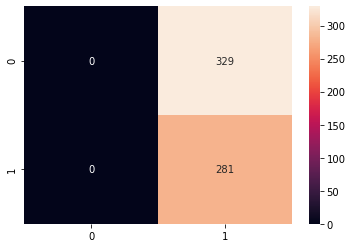

0.2 

Accuracy Score 0.4738
F1 Score 0.6365 

Confusion Matrix


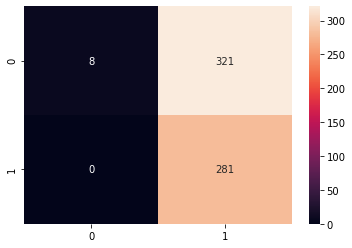

0.3 

Accuracy Score 0.5344
F1 Score 0.6485 

Confusion Matrix


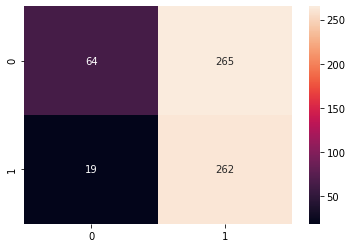

0.4 

Accuracy Score 0.5787
F1 Score 0.6088 

Confusion Matrix


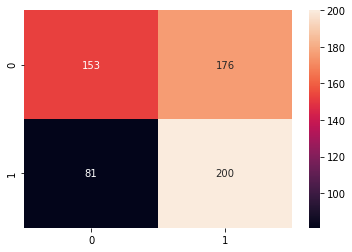

0.5 

Accuracy Score 0.6328
F1 Score 0.5234 

Confusion Matrix


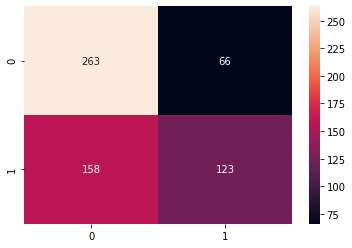

0.6 

Accuracy Score 0.6213
F1 Score 0.446 

Confusion Matrix


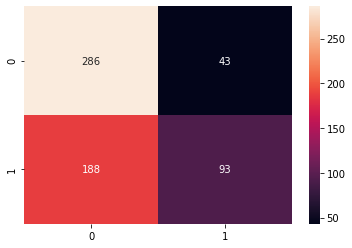

0.7 

Accuracy Score 0.5869
F1 Score 0.2455 

Confusion Matrix


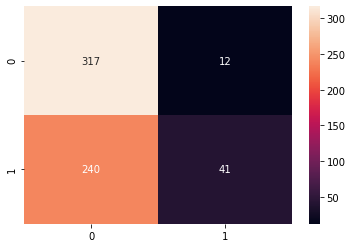

0.8 

Accuracy Score 0.541
F1 Score 0.0071 

Confusion Matrix


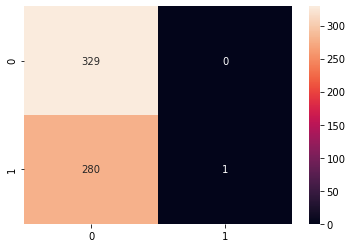

0.9 

Accuracy Score 0.5393
F1 Score 0.0 

Confusion Matrix


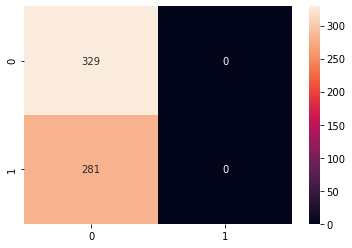

In [97]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

#### AUC and ROC for the training data

AUC for the Training Data: 0.661
AUC for the Test Data: 0.675


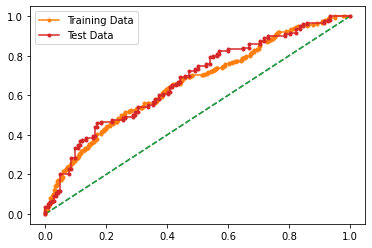

In [98]:
# calculate AUC
lda_train_auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lda_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lda_test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lda_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [99]:
lda_metrics=classification_report(y_train, pred_class_train,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lr_train_f1)

lda_train_precision  0.65
lda_train_recall  0.44
lda_train_f1  0.53


In [100]:
lda_metrics=classification_report(y_test, pred_class_test,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.69
lda_test_recall  0.45
lda_test_f1  0.55


In [101]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],},index=index)
round(data,2)

,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.63,0.66,0.63,0.66
AUC,0.66,0.68,0.66,0.68
Recall,0.45,0.45,0.44,0.45
Precision,0.65,0.69,0.65,0.69
F1 Score,0.53,0.55,0.52,0.55


#### 2.4 Inference: Basis on these predictions, what are the insights and recommendations.